# 회귀_종합실습1_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

18

In [ ]:
clear_session()
model1 = Sequential([
    Dense(8, input_shape = (nfeatures,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 152       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
epo = 400
lr = 0.1
model1.compile(optimizer=Adam(learning_rate=lr), loss='mse')
hist = model1.fit(x_train, y_train, epochs=epo, validation_split=.2, verbose=0).history

* 학습곡선

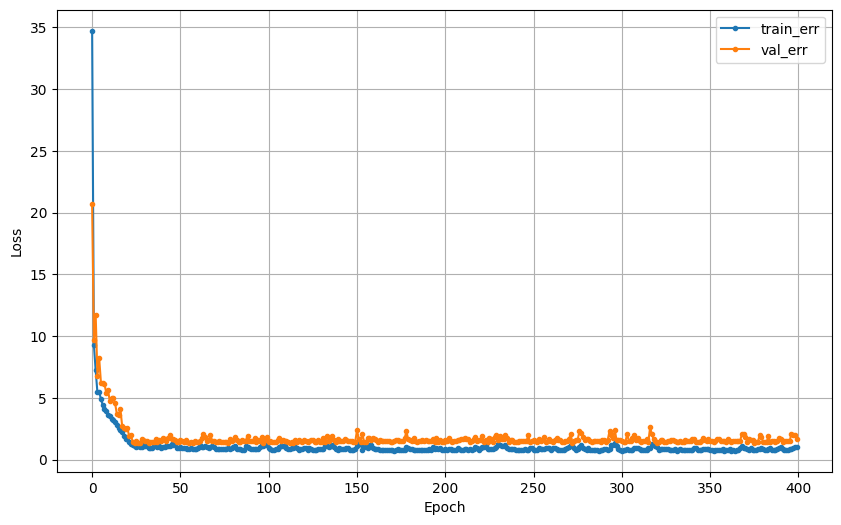

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred1 = model1.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred1, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred1)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred1)}')

3/3 [==============================] - 0s 17ms/step
RMSE : 1.4475356419903294
MAE  : 1.2471072180271148
MAPE : 92208250224640.28


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [ ]:
model2 = Sequential([
    Dense(10, input_shape=(nfeatures, ), activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1)
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                190       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 260 (1.02 KB)
Trainable params: 260 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
lr = 0.1
epo = 300
model2.compile(optimizer=Adam(learning_rate=lr), loss='mse')
hist = model2.fit(x_train, y_train, epochs=epo, validation_split=0.2, verbose=0).history

* 학습곡선

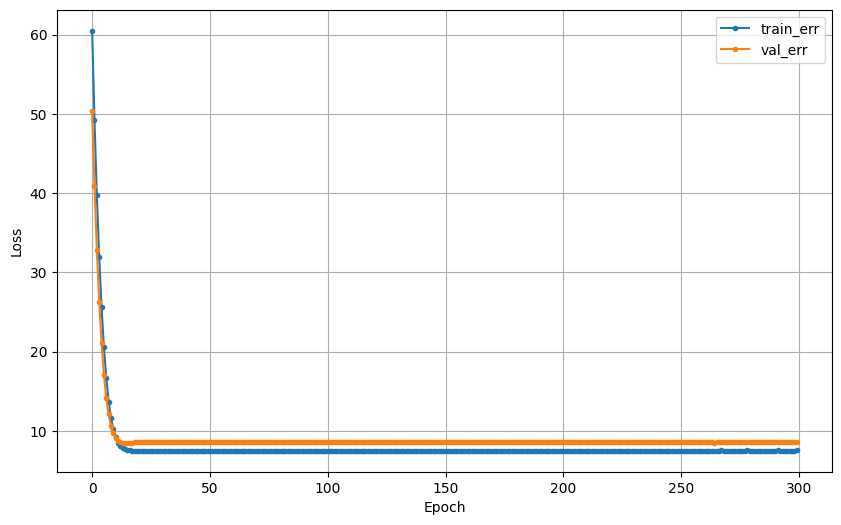

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

3/3 [==============================] - 0s 3ms/step
RMSE : 3.0004584258013427
MAE  : 2.467166233062744
MAPE : 430984613645517.4


## 4.추가 실험1

* Hidden Layer 1개
    * 노드 : 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150
* 모델링 코드를 함수로 생성
    * 입력 : 노드 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [8]:
nfeatures = x_train.shape[1]
def modeling_test1(node) :

    # 노드 수를 입력 받아 모델 선언
    clear_session()
    model = Sequential([Dense(node ,input_shape = (nfeatures,)  , activation = 'relu' ),
                        Dense(1) ] )

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    # mae 결과 return
    return mae

### (2) 반복실행

In [10]:
from tqdm import tqdm

In [12]:
nodes = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
result = []
for n in tqdm(nodes) :
    result.append(modeling_test1(n))

  0%|          | 0/17 [00:00<?, ?it/s]

3/3 [==============================] - 0s 3ms/step


  6%|▌         | 1/17 [00:03<00:51,  3.20s/it]

3/3 [==============================] - 0s 3ms/step


 12%|█▏        | 2/17 [00:05<00:38,  2.56s/it]

3/3 [==============================] - 0s 3ms/step


 18%|█▊        | 3/17 [00:07<00:31,  2.22s/it]

3/3 [==============================] - 0s 3ms/step


 24%|██▎       | 4/17 [00:08<00:26,  2.04s/it]

3/3 [==============================] - 0s 4ms/step


 29%|██▉       | 5/17 [00:10<00:23,  1.92s/it]

3/3 [==============================] - 0s 4ms/step


 35%|███▌      | 6/17 [00:12<00:20,  1.88s/it]

3/3 [==============================] - 0s 3ms/step


 41%|████      | 7/17 [00:15<00:23,  2.33s/it]

3/3 [==============================] - 0s 4ms/step


 47%|████▋     | 8/17 [00:17<00:19,  2.13s/it]

3/3 [==============================] - 0s 3ms/step


 53%|█████▎    | 9/17 [00:19<00:16,  2.02s/it]

3/3 [==============================] - 0s 3ms/step


 59%|█████▉    | 10/17 [00:20<00:13,  1.93s/it]

3/3 [==============================] - 0s 3ms/step


 65%|██████▍   | 11/17 [00:22<00:11,  1.88s/it]

3/3 [==============================] - 0s 3ms/step


 71%|███████   | 12/17 [00:25<00:11,  2.24s/it]

3/3 [==============================] - 0s 3ms/step


 76%|███████▋  | 13/17 [00:27<00:08,  2.12s/it]

3/3 [==============================] - 0s 3ms/step


 82%|████████▏ | 14/17 [00:30<00:07,  2.49s/it]

3/3 [==============================] - 0s 20ms/step


 88%|████████▊ | 15/17 [00:34<00:05,  2.68s/it]

3/3 [==============================] - 0s 3ms/step


 94%|█████████▍| 16/17 [00:36<00:02,  2.47s/it]

3/3 [==============================] - 0s 3ms/step


100%|██████████| 17/17 [00:38<00:00,  2.25s/it]


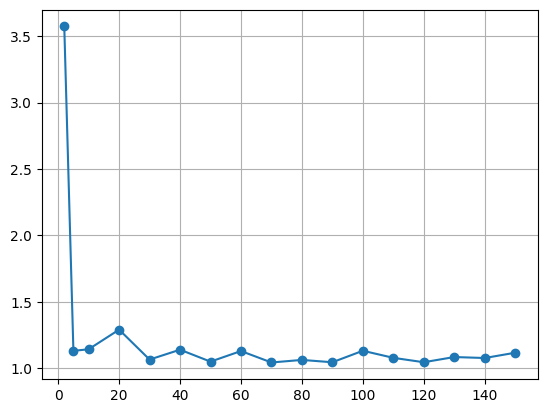

In [14]:
plt.plot(nodes, result, marker='o')
plt.grid()
plt.show()

## 5.추가 실험2

* Hidden Layer 수 : 1,2,3,4,5,6,7,8,9,10
    * 각 레이어의 노드 수 : 10개
* 함수 생성
    * 입력 : 레이어 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [15]:
def modeling_test2(layer) :

    # 레이어 리스트 만들기
    # 레이어 수 만큼 리스트에 레이어 추가

    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Dense(10 ,input_shape = (nfeatures,)  , activation = 'relu' )]

    # 주어진 레이어 수에 맞게 레이어 추가
    for i in range(2, layer) :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(10 , activation = 'relu' ))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(1))
    model = Sequential(layer_list)

    # 레이어 잘 추가된 건지 확인하기 위해 summary 출력
    print(model.summary())

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    return mae


### (2) 반복실행

In [16]:
layers = list(range(1,11))
result = []
for l in layers :
    result.append(modeling_test2(l))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
3/3 [==============================] - 0s 3ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
        

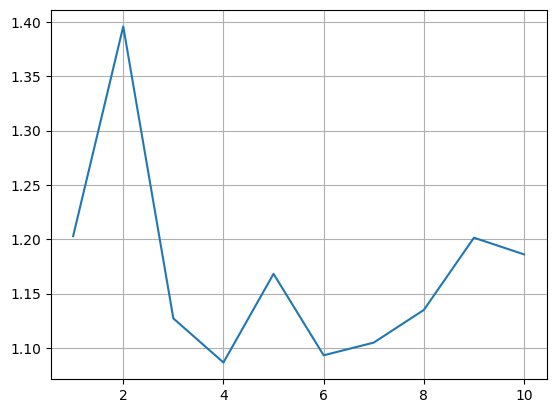

In [17]:
plt.plot(layers, result)
plt.grid()
plt.show()